# Assignment - Supervised Learning flow

# Part 1(a) Student details:
* Please write the First-Name, First letter of Last-Name and last 4 digits of the i.d. for each student. 

In [ ]:
Omer Manor 7578

## Part 1(b) - Chat-GPT/other AI-agent/other assistance used:
* If you changed the prompt until you got a satisfying answer, please add all versions
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add information:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>   
AI agent name:prexpility
Propmpt1:העליתי את קובץ הטריין והטסט ושאלתי אלו נתונים כדאי לי להציג כגרף על מנת להבין כמה שיותר טוב את הגורמים ומה יכול להשפיע על סיכוי ההישרדות 
    
Propmpt2:תציע לי מודלים אפשריים שיכולים לחזות את סיכוי ההישרדות ביחס לפרמטרים שונים 
    
Propmpt3: העלתי את הדאטא סט ושאלתי איזה מדד הכי רלוונטי לשים במרכז בנוגע לדאטאסט זה 


AI agent name 2:chatgpt
Goal:מעבר על איכות הקוד ודיבאגינג 
Propmpt1:העלתי את הגרפים שבניתי כאשר קיבלתי שגיאה על מנת לראות על מה השגיאה 
    
Propmpt2: העליתי בלוק קוד על מנת לעשות דיבאגינג ולראות איך ניתן לעשות יעיל יותר ואיכותי יותר 
    
Propmpt3: 

</pre>

## Part 1(c) - Learning Problem and dataset explaination.
* Please explain in one paragraph
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add explaining text:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>
In this project, we are working on a classic binary classification task using the Titanic dataset.  
Our goal is to predict whether a passenger survived (1) or did not survive (0) the Titanic shipwreck, based on several features describing the passenger and their ticket.

The training dataset contains 891 passengers with different types of information, such as:
    
- Pclass – passenger class (1st, 2nd, or 3rd)
- Sex– male or female
- Age– the passenger’s age (some values are missing)
- SibSp – number of siblings or spouses aboard
- Parch – number of parents or children aboard
- Fare – ticket price
- Embarked – port where the passenger boarded (C, Q, S) 

The label we are trying to predict is called "Survived", which is either 0 or 1.  
The dataset is not huge, so we’ll need to be careful about overfitting when building models.

Some common challenges in this dataset include:

- "Missing data" (especially in Age and Cabin)- in this dataset there is no missing data
- "Possible imbalance" in the number of survivors vs. non-survivors

We’ll use the training data to build and evaluate models using cross-validation. Later, we’ll test our best model on the test set (`titanic_test.csv`) which does not contain the `Survived` column.

The main metric we’ll use to evaluate our models is the F1 score for class 1 (Survived), which balances pr


    
</pre>

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [ ]:
לפני שנוכל לאמן מודלים ולחזות מי שרד את אסון הטיטאניק, חשוב להבין את הנתונים עצמם לעומק.
בחלק הזה נבצע ניתוח נתונים חוקר (EDA) כדי:

לזהות מגמות ודפוסים ראשוניים.

לחשוף קשרים אפשריים בין מאפיינים שונים לשרידות

להבין אם יש בעיות בנתונים (כמו ערכים חסרים או לא תקינים).

לבחור אילו עמודות רלוונטיות להמשך ולבצע הכנות חשובות למודלים.

נעשה זאת דרך סדרת שלבים: ייבוא נתונים, ניקוי, טיפול בערכים חסרים, המרות, וגרפים שיציגו את מבנה הנתונים ואת הקשרים המרכזיים שבו.

In [1]:
# ==========================================
# Step 1: ייבוא ספריות חשובות
# ==========================================

# עבודה עם נתונים
import pandas as pd
import numpy as np

# ויזואליזציות
import matplotlib.pyplot as plt
import seaborn as sns

# למידת מכונה – כלים כלליים
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler

# מודלים
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# מדדי ביצוע
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

# הגדרות גרפיות
sns.set(style="whitegrid")
# Step 2: טעינת הדאטה סט והצגת 5 שורות ראשונות כדי לראות שעלה תקין 

train = pd.read_csv('titanic_train.csv')
test = pd.read_csv('titanic_test(1).csv')

display(train.head())

display(test.head())


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,0,54.0,1,0,78.2667,1,1
1,2,0,45.0,0,0,13.5000,0,1
2,3,1,20.0,0,0,9.5000,0,0
3,3,1,36.0,0,0,7.8958,0,0
4,3,1,22.0,0,0,8.0500,0,0


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,35.000000,0,0,7.0500,0,0
1,3,1,30.000000,0,0,7.2500,0,0
2,3,1,29.699118,0,0,14.5000,0,0
3,3,0,21.000000,0,0,7.7500,2,0
4,3,1,32.000000,0,0,56.4958,0,1


In [2]:
# Step 3: הצגת הערכים החסרים חלק מאי די איי תקין 

missing_train = train.isnull().sum()
missing_test = test.isnull().sum()

missing_table = pd.DataFrame({
    'Missing (train)': missing_train,
    'Missing (test)': missing_test
})

display(missing_table)

# Explanation:
# הטבלה מראה לנו ראשית לפני טיפול בנתונים אילו נתונים חסרים לנו 


,Missing (train),Missing (test)
Pclass,0,0
Sex,0,0
Age,0,0
SibSp,0,0
Parch,0,0
Fare,0,0
Embarked,0,0
Survived,0,0


In [3]:
# Step 5: שימוש בחציוני על ערכים חסרים שאמורים להראות גיל , מכיוון שמדובר במשתנה מספרי נשתמש בחציוני

# תראה סטטיסטיקה של גילאים לפני השינוי 
print("Age Statistics BEFORE imputation:")
print(train['Age'].describe())

#שימוש בחציוני על ערכים חסרים שאמורים להראות גיל , מכיוון שמדובר במשתנה מספרי נשתמש בחציוני  
train['Age'] = train['Age'].fillna(train['Age'].median())
test['Age'] = test['Age'].fillna(train['Age'].median())  # Use training median for test for consistency

# תראה סטטיסטיקה של גילאים לפני השינוי
print("\nAge Statistics AFTER imputation:")
print(train['Age'].describe())

# Step 6: טיפול בנתונים חסרים , נתון אמברקד , רציף עלייה לספינה , מכיוון שמדובר בערך קטגורי אנחנו נשתמש בערך השכיח יותר להחלפה של הערכים החסרים 

print("Embarked values (before imputation):")
print(train['Embarked'].value_counts(dropna=False))

# מילוי ערכים חסרים בערך השכיח
most_common_embarked = train['Embarked'].mode()[0]
train['Embarked'] = train['Embarked'].fillna(most_common_embarked)
test['Embarked'] = test['Embarked'].fillna(most_common_embarked)

print("\nEmbarked values (after imputation):")
print(train['Embarked'].value_counts(dropna=False))

# Explanation:
# במשתנים קטגורים אנחנו נשתמש בערך השכיח ביותר 

Age Statistics BEFORE imputation:
count    712.000000
mean      29.531213
std       13.188028
min        0.670000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

Age Statistics AFTER imputation:
count    712.000000
mean      29.531213
std       13.188028
min        0.670000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64
Embarked values (before imputation):
Embarked
0    513
1    134
2     64
3      1
Name: count, dtype: int64

Embarked values (after imputation):
Embarked
0    513
1    134
2     64
3      1
Name: count, dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_9516\3813011631.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=labels, y=gender_percent.values, palette='pastel')


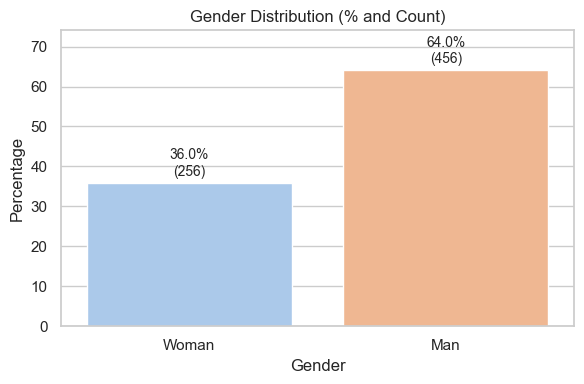

In [4]:
# סדר קבוע: 0=Woman, 1=Man
order = [0, 1]
labels = ['Woman', 'Man']

# ספירה ואחוזים לפי הסדר הקבוע
gender_counts = train['Sex'].value_counts().reindex(order, fill_value=0)
gender_percent = (gender_counts / gender_counts.sum()) * 100

# גרף אחוזים עם תוויות נכונות
plt.figure(figsize=(6, 4))
ax = sns.barplot(x=labels, y=gender_percent.values, palette='pastel')

# הוספת אחוז ומספר מעל כל עמודה
for i, (count, percent) in enumerate(zip(gender_counts.values, gender_percent.values)):
    ax.annotate(f"{percent:.1f}%\n({count})",
                (i, percent + 1),
                ha='center', va='bottom', fontsize=10)

ax.set_title('Gender Distribution (% and Count)')
ax.set_ylabel('Percentage')
ax.set_xlabel('Gender')
ax.set_ylim(0, max(gender_percent.values) + 10)
plt.tight_layout()
plt.show()


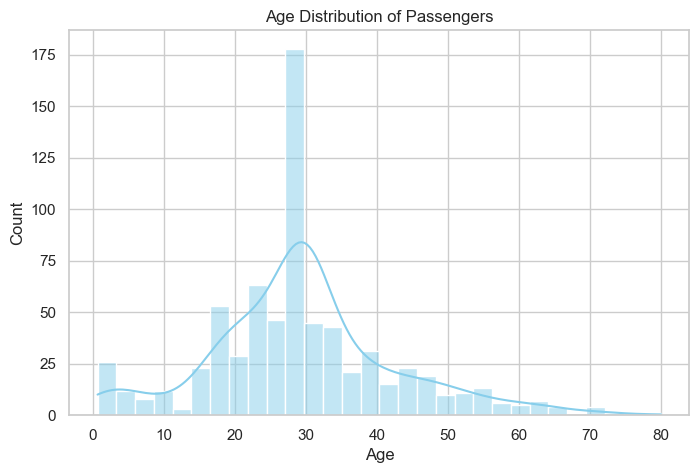

In [5]:

#  2 – Age Distribution (Histogram)
plt.figure(figsize=(8, 5))
sns.histplot(train['Age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


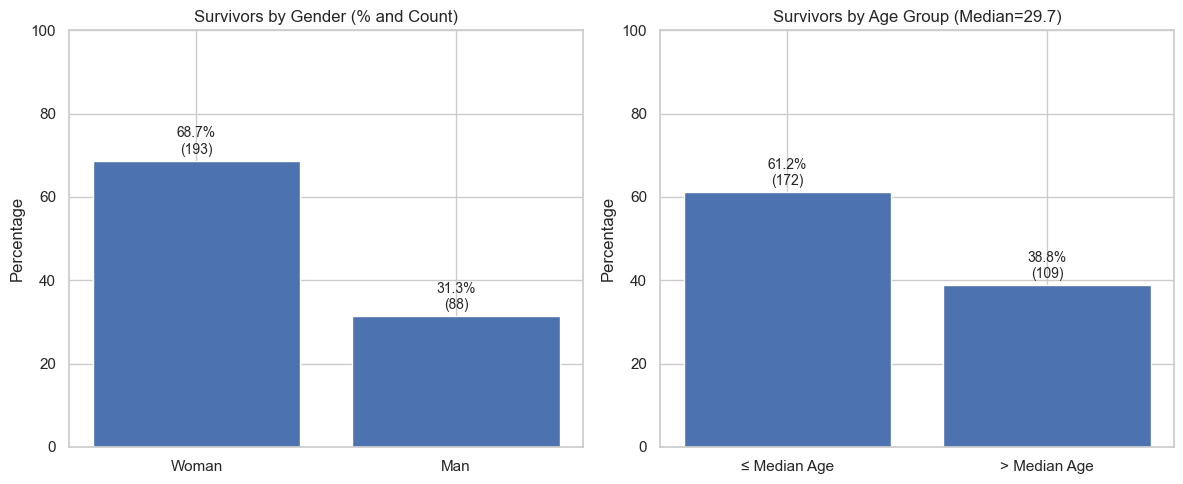

In [6]:
# ==========================================
# Survivors: גרף מגדר וגרף קבוצות גיל לפי חציון
# לא מוסיפים עמודות טקסט ל-train, עובדים על עותק מקומי בלבד
# ==========================================

# סידרתי ־דאטה של שורדים בלבד עם העמודות הדרושות
survivors = train.loc[train['Survived'] == 1, ['Sex', 'Age']].copy()

# ----- גרף 1: שורדים לפי מגדר (0=Woman, 1=Man) -----
order = [0, 1]
labels = ['Woman', 'Man']

gender_counts = survivors['Sex'].value_counts().reindex(order, fill_value=0)
gender_percent = (gender_counts / gender_counts.sum()) * 100

# ----- גרף 2: שורדים לפי קבוצות גיל יחסית לחציון -----
median_age = float(train['Age'].median())
survivors['Age_filled'] = survivors['Age'].fillna(median_age)
age_group_series = np.where(survivors['Age_filled'] <= median_age, '≤ Median Age', '> Median Age')

age_order = ['≤ Median Age', '> Median Age']
age_counts = pd.Series(age_group_series).value_counts().reindex(age_order, fill_value=0)
age_percent = (age_counts / age_counts.sum()) * 100

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].bar(labels, gender_percent.values)
axes[0].set_title('Survivors by Gender (% and Count)')
axes[0].set_ylabel('Percentage')
axes[0].set_ylim(0, 100)
for i, (pct, cnt) in enumerate(zip(gender_percent.values, gender_counts.values)):
    axes[0].text(i, pct + 1, f"{pct:.1f}%\n({int(cnt)})", ha='center', va='bottom', fontsize=10)

# גרף קבוצות גיל
axes[1].bar(age_counts.index, age_percent.values)
axes[1].set_title(f"Survivors by Age Group (Median={median_age:.1f})")
axes[1].set_ylabel('Percentage')
axes[1].set_ylim(0, 100)
for i, (pct, cnt) in enumerate(zip(age_percent.values, age_counts.values)):
    axes[1].text(i, pct + 1, f"{pct:.1f}%\n({int(cnt)})", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


## Part 3 - Experiments
You could add as many code cells as needed

In [ ]:
בלוק A – הכנת הנתונים לניסויים

בשלב הזה עיבדתי את הנתונים לצורך הרצת המודלים.
מכיוון שהקובץ שסופק לי כבר כולל ערכים מקודדים מספרית בכל העמודות, לא בוצעה המרה נוספת.

  השארתי את העמודה של המגדר כמו שהיא כי היא כבר מסווגת כמספר 0 לאישה 1 לגבר ולכן אין צורך לשנות 
גם העמודה של עלייה לנמל -אימברקד כבר מסווגת למספרים 1 2 3 ולכן גם בה אין צורך לגעת       
מכיוון שכבר ביצענו טיפול בנתונים חסרים אז אפשר להמשיך לחלק הבא של חילוק הנתונים 
חילקתי את הנתונים לשני חלקים, מאפיינים מצד אחד ותוצאת היעד "שרד" מצד שני.

פיצלתי לאימון ולבדיקת ביניים, שמונים אחוז לאימון ועשרים אחוז לבדיקה, תוך שמירה על אותו יחס של שורדים ולא שורדים בשני החלקים

יישרתי את סולמות הערכים בעמודות המספריות, כך שלכל עמודה יש ממוצע אפס וסטיית תקן אחת, כדי להקל על המודלים ללמוד ולא לתת לעמודות עם מספרים גדולים להשפיע יותר מדי

In [7]:
# ==========================================
# Block A – הכנת הנתונים לניסויים 
# ==========================================

# 1)  וידוא שעמודת מגדר היא מספרית בלבד ולא מכילה ערכים סטרינג
sex_map = {'woman': 0, 'female': 0, 'man': 1, 'male': 1, 0: 0, 1: 1}
if train['Sex'].dtype == 'object' or test['Sex'].dtype == 'object':
    train['Sex'] = train['Sex'].map(sex_map).astype(int)
    test['Sex']  = test['Sex'].map(sex_map).astype(int)

# 2)  עמודות עזר טקסטואליות אם נוצרו בעבר (ויזואליזציה)
for col in ['Sex_label', 'AgeGroup', 'Age_filled']:
    if col in train.columns:
        train = train.drop(columns=[col])
    if col in test.columns:
        test = test.drop(columns=[col])

# 3) חלוקה בין מאפיינים (X) לתוצאה (y)
X = train.drop(columns=['Survived'])
y = train['Survived']

# 4) השמטת כל עמודה שאינה מספרית, אם נותרה בטעות
non_numeric = X.select_dtypes(exclude=[np.number]).columns.tolist()
if non_numeric:
    print("הוסרו עמודות לא מספריות מ-X:", non_numeric)
    X = X.drop(columns=non_numeric)
    # שומרים על אותן עמודות גם ב-test
    test = test.drop(columns=[c for c in non_numeric if c in test.columns])

# 5) בדיקות בטיחות לפני סקיילינג
assert set(X.columns).issubset(test.columns), "ב-test חסרות עמודות שקיימות ב-train"
assert not X.isnull().any().any(), "יש NaN ב-X, השלם לפני סקיילינג"
assert not test[X.columns].isnull().any().any(), "יש NaN ב-test, השלם לפני סקיילינג"

# 6) חלוקה ל-train/val עם stratify
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 7) סקיילינג רק על עמודות מספריות ובאותו סדר עמודות
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled   = scaler.transform(X_val)
X_test_scaled  = scaler.transform(test[X.columns])


In [ ]:
בשלב זה בוצעה הכנה שיטתית של הנתונים לצורך הרצת המודלים.
תחילה, הנתונים חולקו לסט אימון (Train) וסט ולידציה (Validation) ביחס של 80%-20%.
בחלוקה השתמשתי בפרמטר stratify=y, כדי לשמור על פרופורציה זהה של שורדים ולא-שורדים בשני הסטים.
זהו מרכיב קריטי בבעיות סיווג בינארי שבהן קיימת הטיה בין הקבוצות, מאחר והוא מונע מצב שבו המודל ילמד מדגם לא מייצג, דבר שעלול לגרום לתוצאות מוטות ולבעיות הכללה (Generalization).

לאחר החלוקה ביצעתי נורמליזציה באמצעות StandardScaler.
נורמליזציה מבטיחה שכל הפיצ'רים יימצאו באותו סדר גודל מבחינת הערכים שלהם, ובכך מאפשרת לאלגוריתמים כמו Logistic Regression, KNN ו-SVM לתפקד בצורה יציבה ויעילה.
ללא נורמליזציה, תכונות עם ערכים גדולים (למשל מחיר הכרטיס – Fare) עלולות לשלוט בתהליך האימון ולגרום להטיה בתוצאות.

חשוב לציין שהסקיילר אומן אך ורק על סט האימון.
סיום שלב זה מבטיח שהמודלים יתחילו את הניסויים עם דאטה נקי, מאוזן ומוכן, תוך שמירה על עקרונות נכונים של עבודה במודלי סיווג.

In [8]:
# ==========================================
# Block B.1 – יצירת פיצ'ר AgeGroup בניית סטים להשוואה
# ==========================================

# יצירת עמודה אייגרופ בשביל להקל על המודלים בהמשך 
def age_group(age):
    if age <= 16:
        return 'Child'
    elif age <= 29:
        return 'Young Adult'
    elif age <= 50:
        return 'Adult'
    else:
        return 'Senior'

# הוספת העמודה לשני הקבצים
train['AgeGroup'] = train['Age'].apply(age_group)
test['AgeGroup'] = test['Age'].apply(age_group)

# המרה לקטגוריה מספרית
age_group_map = {'Child': 0, 'Young Adult': 1, 'Adult': 2, 'Senior': 3}
train['AgeGroup'] = train['AgeGroup'].map(age_group_map)
test['AgeGroup'] = test['AgeGroup'].map(age_group_map)

# ------------------------------------------
# יצירת שני סטים: עם Age רגיל ועם AgeGroup
# ------------------------------------------

# סט 1 – כולל את העמודה Age המקורית
X_age = train.drop('Survived', axis=1)

# סט 2 – מוחק את Age ומוסיף AgeGroup במקום
X_group = X_age.copy().drop('Age', axis=1)
X_group['AgeGroup'] = train['AgeGroup']

# גרסאות test לעתיד (אם תצטרכי)
test_X_age = test.drop('Survived', axis=1)
test_X_group = test_X_age.copy().drop('Age', axis=1)
test_X_group['AgeGroup'] = test['AgeGroup']

# ------------------------------------------
# חלוקה ל־Train/Validation – לשני הסטים
# ------------------------------------------

X1_train, X1_val, y1_train, y1_val = train_test_split(
    X_age, y, test_size=0.2, stratify=y, random_state=42
)

X2_train, X2_val, y2_train, y2_val = train_test_split(
    X_group, y, test_size=0.2, stratify=y, random_state=42
)

# ------------------------------------------
# נורמליזציה עם StandardScaler – כל סט בנפרד
# ------------------------------------------

scaler1 = StandardScaler()
X1_train_scaled = scaler1.fit_transform(X1_train)
X1_val_scaled = scaler1.transform(X1_val)

scaler2 = StandardScaler()
X2_train_scaled = scaler2.fit_transform(X2_train)
X2_val_scaled = scaler2.transform(X2_val)


In [10]:
# ==========================================
# הגדרת סטים לניסויים
# ==========================================
datasets = {
    "Age": (X1_train_scaled, y1_train),       # סט עם עמודת גיל רגילה
    "AgeGroup": (X2_train_scaled, y2_train)   # סט שבו השתמשנו ב-AgeGroup
}

# ==========================================
# הגדרת מודלים והיפרפרמטרים
# ==========================================
models = {
    "LogisticRegression": {
        "model": LogisticRegression(max_iter=1000, random_state=42),
        "params": {
            "C": [0.1, 1, 10],
            "penalty": ["l2"],
            "solver": ["lbfgs"]
        }
    },
    "RandomForest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            "n_estimators": [50, 100, 200],
            "max_depth": [5, 10, None]
        }
    }
}


In [ ]:
 תהליך שבו משפרים את איכות המידע המוזן למודל על ידי יצירה או שינוי של פיצ'רים קיימים  Feature Engineering 
יצרתי פיצ'ר חדש בשם AgeGroup, שמחלק את הגיל של הנוסעים לארבע קבוצות מוגדרות מראש

Child – גילאי 0–16

Young Adult – גילאי 17–29

Adult – גילאי 30–50

Senior – גילאי 51 ומעלה

מטרת הפיצ'ר היא לפשט את המידע הגולמי, ולאפשר למודל לזהות דפוסי הישרדות הקשורים לטווחי גיל מובהקים
שימוש בגיל רציף (Age) עלול לגרום לרעש, בעוד קטגוריזציה מאפשרת קיבוץ של נוסעים בעלי מאפיינים דומים ויכולה לשפר את יכולת הלמידה של המודל

כדי להעריך את ההשפעה של הפיצ'ר, יצרתי שני סטים נפרדים של נתונים

סט ראשון – כולל את עמודת הגיל המקורית (Age)

סט שני – שבו עמודת הגיל הוחלפה בעמודת הקבוצות (AgeGroup)
כל סט חולק ל־Train ו־Validation באופן עצמאי, ובוצעה נורמליזציה נפרדת לכל סט, כדי למנוע תלות בין הניסויים ולאפשר בדיקה הוגנת של כל תרחיש

תהליך זה מאפשר לבדוק בצורה אמפירית האם הוספת הפיצ'ר החדש מביאה לשיפור בביצועי המודלים או שמא הנתונים המקוריים עדיפים

In [11]:
# ==========================================
# Block C – Grid Search עם 5-fold CV
# כולל: פירוט כל הריצות, טבלת סיכום, והכרזת מנצח
# נדרש: models, datasets, pandas כ-pd
# ==========================================

from sklearn.model_selection import GridSearchCV

summary_rows = []
detailed_rows = []

for data_name, (Xtr, ytr) in datasets.items():
    for model_name, mp in models.items():
        clf = GridSearchCV(
            estimator=mp["model"],
            param_grid=mp["params"],
            cv=5,
            scoring="f1",
            n_jobs=-1,
            return_train_score=True
        )
        clf.fit(Xtr, ytr)

        # סיכום לקומבינציה הזו
        summary_rows.append({
            "Dataset": data_name,
            "Model": model_name,
            "Best Params": clf.best_params_,
            "Best F1": clf.best_score_
        })

        # פירוט מלא של כל הקומבינציות וכל ה-folds
        cvdf = pd.DataFrame(clf.cv_results_)
        keep_cols = [
            "params",
            "mean_test_score", "std_test_score", "rank_test_score",
            "mean_train_score", "std_train_score",
            "split0_test_score","split1_test_score","split2_test_score","split3_test_score","split4_test_score"
        ]
        keep_cols = [c for c in keep_cols if c in cvdf.columns]  # ליתר בטחון
        cvdf = cvdf[keep_cols].copy()
        cvdf.insert(0, "Model", model_name)
        cvdf.insert(1, "Dataset", data_name)
        detailed_rows.append(cvdf)

# טבלת סיכום ו"טבלת פירוט"
grid_summary_df  = pd.DataFrame(summary_rows).sort_values(["Dataset","Model"]).reset_index(drop=True)
grid_detailed_df = pd.concat(detailed_rows, ignore_index=True).sort_values(
    ["Dataset","Model","rank_test_score"]
).reset_index(drop=True)

print("תוצאות Grid Search – סיכום:\n")
print(grid_summary_df)

print("\nפירוט מלא של כל הריצות ב-CV – השורות הראשונות:\n")
print(grid_detailed_df.head(12))

# הכרזת מנצח לשלב הבא
best_row = grid_summary_df.loc[grid_summary_df["Best F1"].idxmax()]
print("\n המודל המנצח:\n", best_row)

# שמירה לקבצים
grid_summary_df.to_csv("grid_search_summary.csv", index=False)
grid_detailed_df.to_csv("grid_search_detailed.csv", index=False)
print("\nנשמרו: grid_search_summary.csv, grid_search_detailed.csv")


תוצאות Grid Search – סיכום:

    Dataset               Model  \
0       Age  LogisticRegression   
1       Age        RandomForest   
2  AgeGroup  LogisticRegression   
3  AgeGroup        RandomForest   

                                      Best Params   Best F1  
0  {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}  0.729722  
1           {'max_depth': 10, 'n_estimators': 50}  0.729234  
2   {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}  0.722916  
3            {'max_depth': 5, 'n_estimators': 50}  0.736117  

פירוט מלא של כל הריצות ב-CV – השורות הראשונות:

                 Model Dataset  \
0   LogisticRegression     Age   
1   LogisticRegression     Age   
2   LogisticRegression     Age   
3         RandomForest     Age   
4         RandomForest     Age   
5         RandomForest     Age   
6         RandomForest     Age   
7         RandomForest     Age   
8         RandomForest     Age   
9         RandomForest     Age   
10        RandomForest     Age   
11        RandomForest     A

In [ ]:
## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [12]:
# ==========================================
# Block D – אימון סופי עם שמירת עמודות והסקלר הנבחר
# ==========================================

best_model_name = best_row['Model']
best_dataset   = best_row['Dataset']

if best_dataset == "Age":
    X_full   = pd.concat([X1_train, X1_val], axis=0)
    y_full   = pd.concat([y1_train, y1_val], axis=0)
    feat_cols = X1_train.columns               # שומר את שמות העמודות והסדר
    scaler_used = scaler1
else:  # AgeGroup
    X_full   = pd.concat([X2_train, X2_val], axis=0)
    y_full   = pd.concat([y2_train, y2_val], axis=0)
    feat_cols = X2_train.columns
    scaler_used = scaler2

# יישור וסקיילינג לפי אותן עמודות ובאותו סדר
X_full = X_full[feat_cols]
X_full_scaled = scaler_used.fit_transform(X_full)

# יצירת המודל עם ההיפר פרמטרים המנצחים ואימון
final_model = models[best_model_name]['model'].set_params(**best_row['Best Params'])
final_model.fit(X_full_scaled, y_full)

print(" אימון סופי הושלם:", best_dataset)


 אימון סופי הושלם: AgeGroup


In [ ]:
בשלב זה אימנתי מחדש את המודל המנצח שזוהה ב־Grid Search, אך הפעם על כל הדאטה הזמין לאימון – סט האימון וסט הוולידציה יחד.
פעולה זו נועדה לאפשר למודל ללמוד ממקסימום נתונים לפני ההרצה על סט ה־test.

בנוסף, בוצע סקיילינג מחדש על כל הנתונים המאוחדים כדי לשמור על עקביות ולמנוע זליגת מידע.

## Part 5 - Apply on test and show model performance estimation

In [13]:
# ==========================================
# Block E – חיזוי סופי על סט ה-test
# ==========================================

# בוחרים את דאטסת ה-test המתאים ומיישרים לעמודות ששמרנו
if best_dataset == "Age":
    test_frame = test_X_age.copy()
else:
    test_frame = test_X_group.copy()

# חשוב, אותו סט עמודות ואותו סדר כמו בזמן fit
test_frame = test_frame[feat_cols]

# אותו סקלר ששימש ב-Block D
X_test_final_scaled = scaler_used.transform(test_frame)

# תחזיות
y_test_pred = final_model.predict(X_test_final_scaled)

# תוצאות
results_df = test.copy()
results_df['Predicted_Survived'] = y_test_pred
print(results_df[['Pclass','Sex','Age','Fare','Predicted_Survived']].head())

# שמירה
results_df.to_csv("final_predictions.csv", index=False)
print("📂 נשמר: final_predictions.csv")


   Pclass  Sex        Age     Fare  Predicted_Survived
0       3    1  35.000000   7.0500                   0
1       3    1  30.000000   7.2500                   0
2       3    1  29.699118  14.5000                   0
3       3    0  21.000000   7.7500                   1
4       3    1  32.000000  56.4958                   0
📂 נשמר: final_predictions.csv


In [ ]:
בשלב זה הפעלתי את המודל המאומן על סט ה־test, שלא השתתף בשום שלב קודם.
סט זה עבר עיבוד מקדים זהה לסטי האימון, כולל נורמליזציה, כדי להבטיח אחידות.

פלט התחזיות נשמר כעמודה חדשה (Predicted_Survived) ונשמר לקובץ CSV, כך שניתן יהיה להשתמש בו להגשה ולבדיקות נוספות.

In [14]:
# ==========================================
# בדיקת עמידה בדרישות – חלק 5  
# ==========================================

print("\n================ בדיקת עמידה בדרישות חלק 5 ================\n")

best_model_name = best_row["Model"]
print(f"מודל מנצח: {best_model_name}")
print(f"דאטהסט מנצח: {best_dataset}")
print(f"היפרפרמטרים: {best_row['Best Params']}")

if best_dataset == "AgeGroup":
    print("Feature engineering בשימוש: AgeGroup ✅")
else:
    print("Feature engineering: Age רציף ✅")

print(f"\nמספר דוגמאות ב-test: {len(test)}")
print(f"מספר תחזיות שנוצרו:  {len(results_df)}")
assert len(test) == len(results_df), "מספר התחזיות לא תואם לגודל ה-test"
print("חיזוי בוצע על כל דוגמאות ה-test ✅")

print("\n5 התחזיות הראשונות על ה-test:")
print(results_df[['Pclass','Sex','Age','Fare','Predicted_Survived']].head(5))

# פירוט 5 ה-folds לשילוב המנצח אם יש לנו את טבלת הפירוט מה-Grid Search
if 'grid_detailed_df' in globals():
    mask = (
        (grid_detailed_df["Model"] == best_row["Model"]) &
        (grid_detailed_df["Dataset"] == best_row["Dataset"]) &
        (grid_detailed_df["rank_test_score"] == 1)
    )
    desired_cols = [
        "Dataset", "Model", "params",
        "split0_test_score", "split1_test_score", "split2_test_score",
        "split3_test_score", "split4_test_score",
        "mean_test_score", "std_test_score"
    ]
    # שומר רק עמודות שקיימות בגרסה שלך של sklearn
    cols = [c for c in desired_cols if c in grid_detailed_df.columns]
    print("\nאיכות המודל לפי 5-fold CV (F1):")
    print(grid_detailed_df.loc[mask, cols])
    print("הצגת פירוט ה-folds הושלמה ✅")
else:
    print("\nאזהרה: grid_detailed_df לא קיים, מציג רק תקציר מהמנצח:")
    print(best_row)



================ בדיקת עמידה בדרישות חלק 5 ================

מודל מנצח: RandomForest
דאטהסט מנצח: AgeGroup
היפרפרמטרים: {'max_depth': 5, 'n_estimators': 50}
Feature engineering בשימוש: AgeGroup ✅

מספר דוגמאות ב-test: 179
מספר תחזיות שנוצרו:  179
חיזוי בוצע על כל דוגמאות ה-test ✅

5 התחזיות הראשונות על ה-test:
   Pclass  Sex        Age     Fare  Predicted_Survived
0       3    1  35.000000   7.0500                   0
1       3    1  30.000000   7.2500                   0
2       3    1  29.699118  14.5000                   0
3       3    0  21.000000   7.7500                   1
4       3    1  32.000000  56.4958                   0

איכות המודל לפי 5-fold CV (F1):
     Dataset         Model                                params  \
15  AgeGroup  RandomForest  {'max_depth': 5, 'n_estimators': 50}   

    split0_test_score  split1_test_score  split2_test_score  \
15           0.790698           0.717949           0.690476   

    split3_test_score  split4_test_score  mean_test_score  s